In [1]:
from Functions import *

Sample start date:  2005-03-25 00:00:30 
Sample end date: 2005-03-26 00:00:30


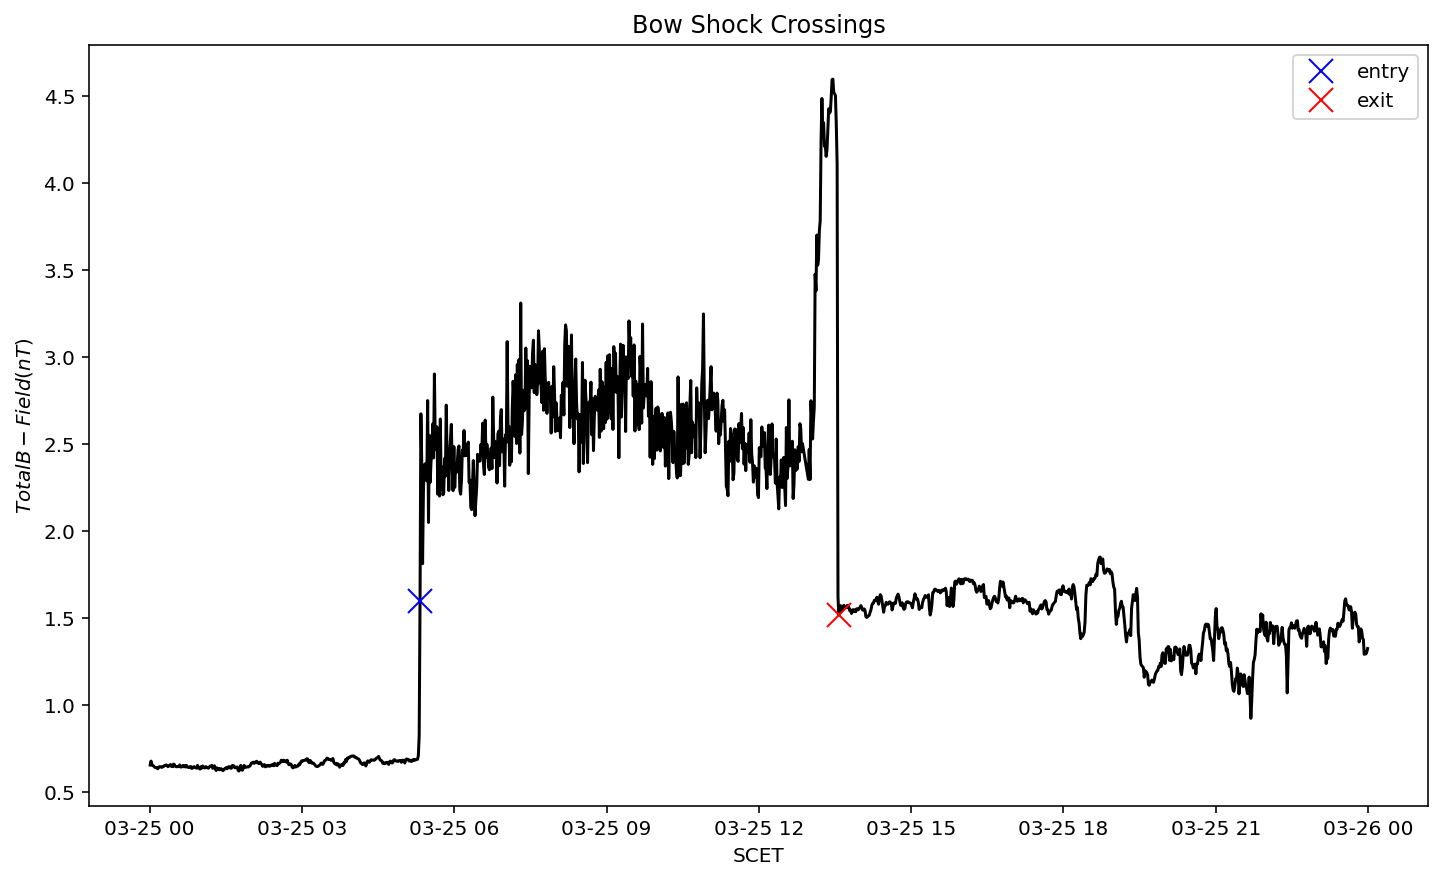

In [2]:
windowsize = 7
estimatedNumCrossings = 0
year = 2005
start_day1 = 84
end_day1 = 85

day_data1_2005 = get_day_data(start_day1, end_day1, year)
#plot_KSM(day_data1_2004, year, start_day1, end_day1, xFormat = "Hour")
entries1, exits1, ax1, ksmcoords_1,cross_array1 = identify_crossings_2(day_data1_2005, windowsize, estimatedNumCrossings,3,2,200)


#orbit2 exit,2004

estimatedNumCrossings = 14

start_day2 = 309.8
end_day2 = 313
day_data2_2004 = get_day_data(start_day2, end_day2, year)
#plot_KSM(day_data2_2004, year, start_day2, end_day2, xFormat = "Hour")
entries2, exits2, ax2, ksmcoords_2,cross_array2 = identify_crossings_2(day_data2_2004, windowsize, estimatedNumCrossings,3,2,430)

In [3]:
print('crossing dates',cross_array1)


crossing dates ['2005-03-25 05:19:30', '2005-03-25 13:34:30']


Sample start date:  2005-03-25 00:00:30 
Sample end date: 2005-03-26 00:00:30


In [8]:
offset=4
mins=8+offset

b1, b2 = extract_B_vector3(cross_array1, day_data1_2005, mins,offset)

type1 = ['entry', 'exit']
num = np.arange(1, len(cross_array1)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)

S=1 θ_BN value = 72.81848931706739
Standard deviation = 6.176540050282009
S=2 θ_BN value = 64.03182491270431
Standard deviation = 5.3441353802950795


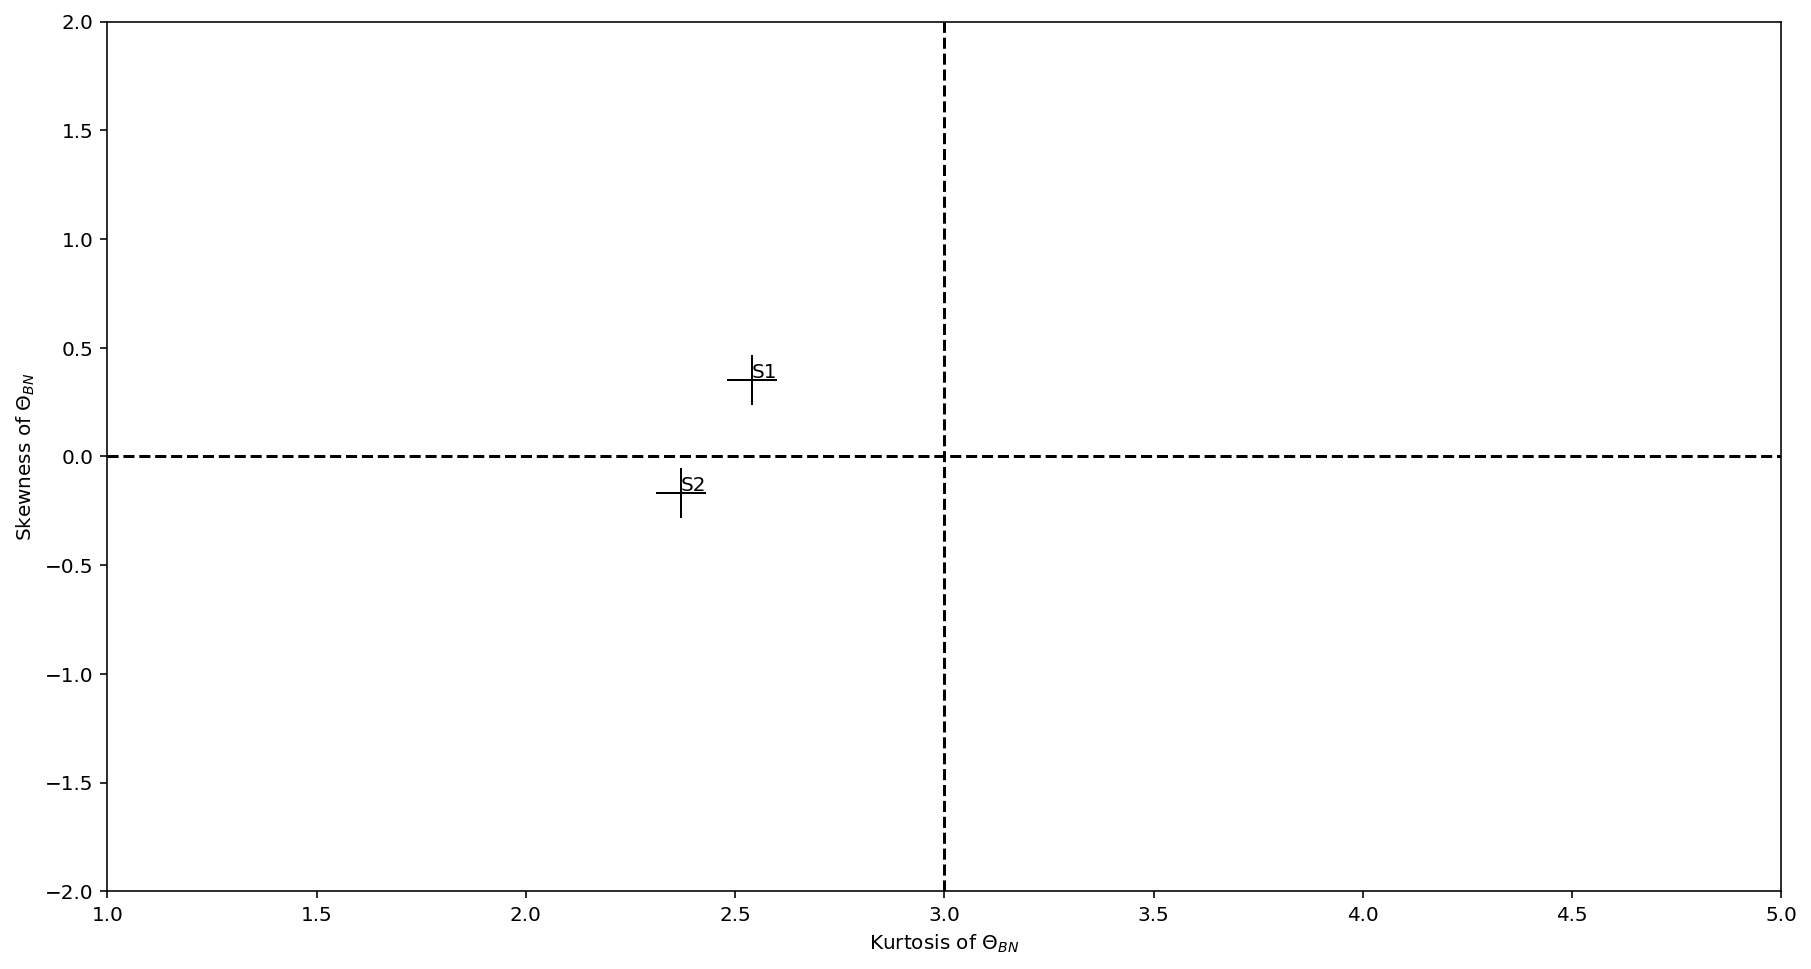

In [9]:
Plot_Dist_for_theta([*shock_v])

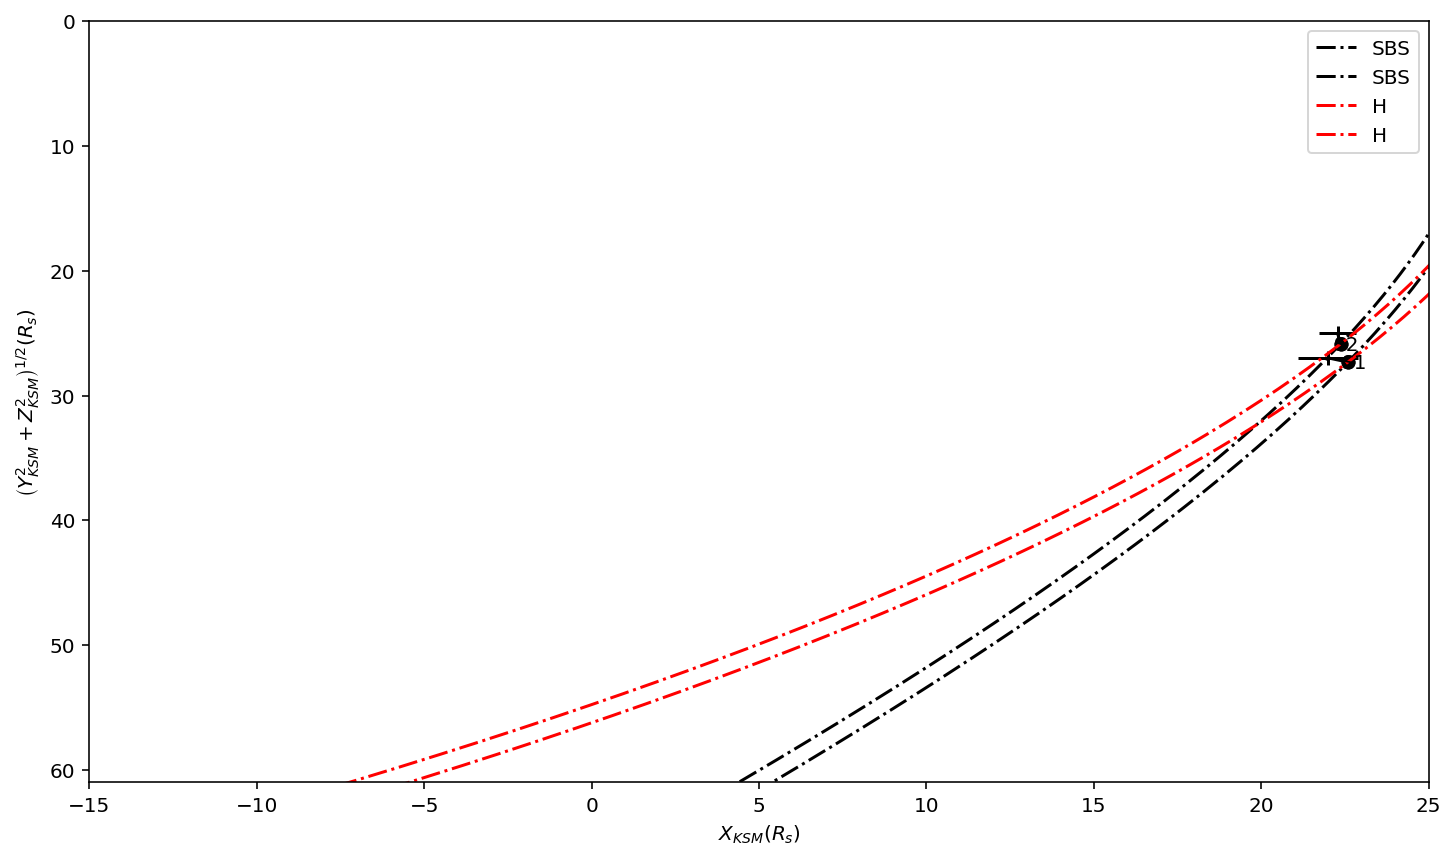

In [10]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data1_2005,cross_array1,-1,ave_ncp,std_ncp,1,2)
plt.ylim(0,61)
plt.xlim(-15,25)
plt.gca().invert_yaxis()

Theta_CPM  [3.4974285520142416, 57.47587443612502]
Std [32.32741120131507, 59.443187615720554]


(22.0, 25.0)

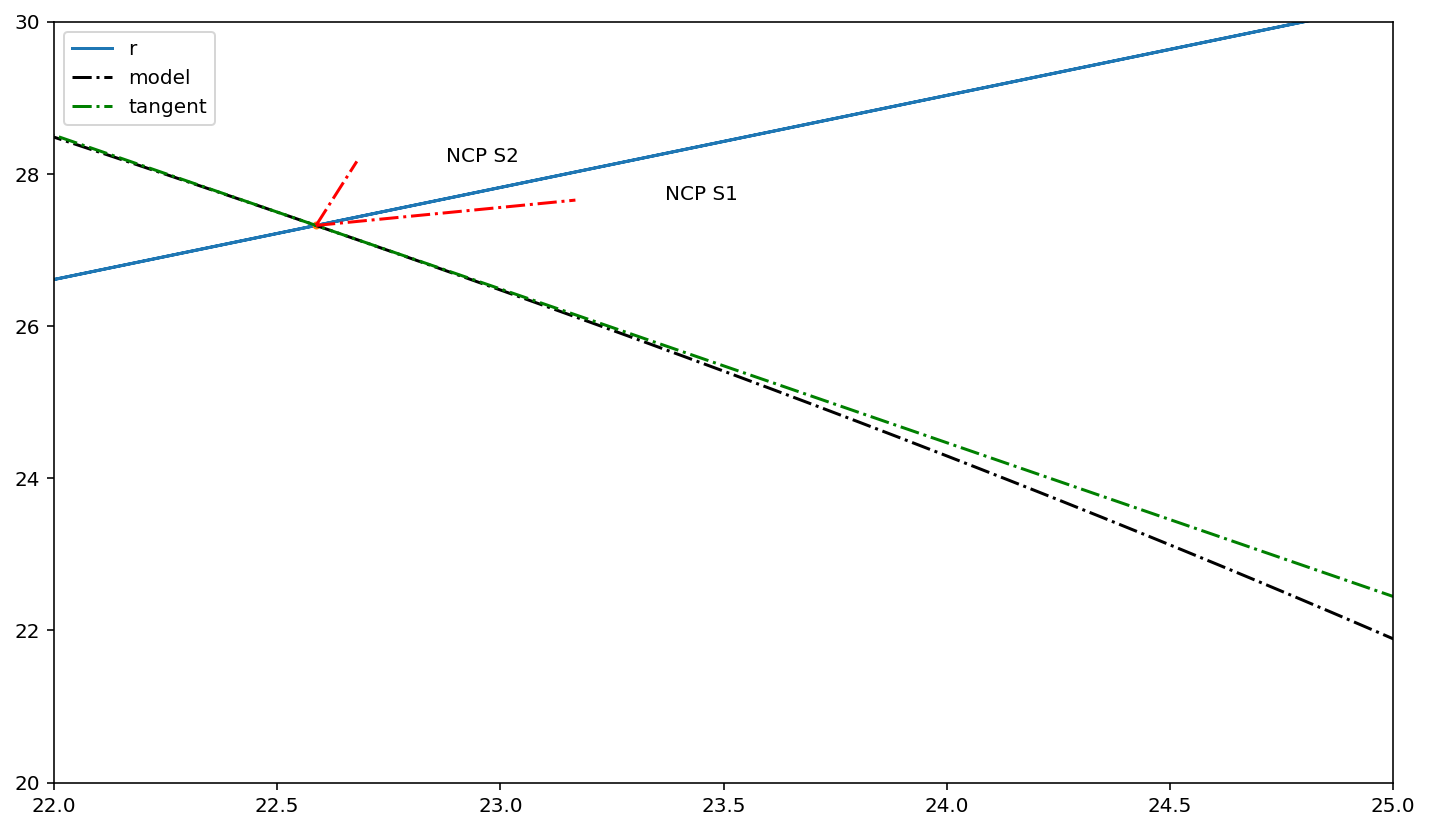

In [14]:
t,st=calCPM(day_data1_2005,cross_array1,ave_ncp,rho_ncp,std_ncp,srho_ncp)
plt.ylim(20,30)
plt.xlim(22,25 )

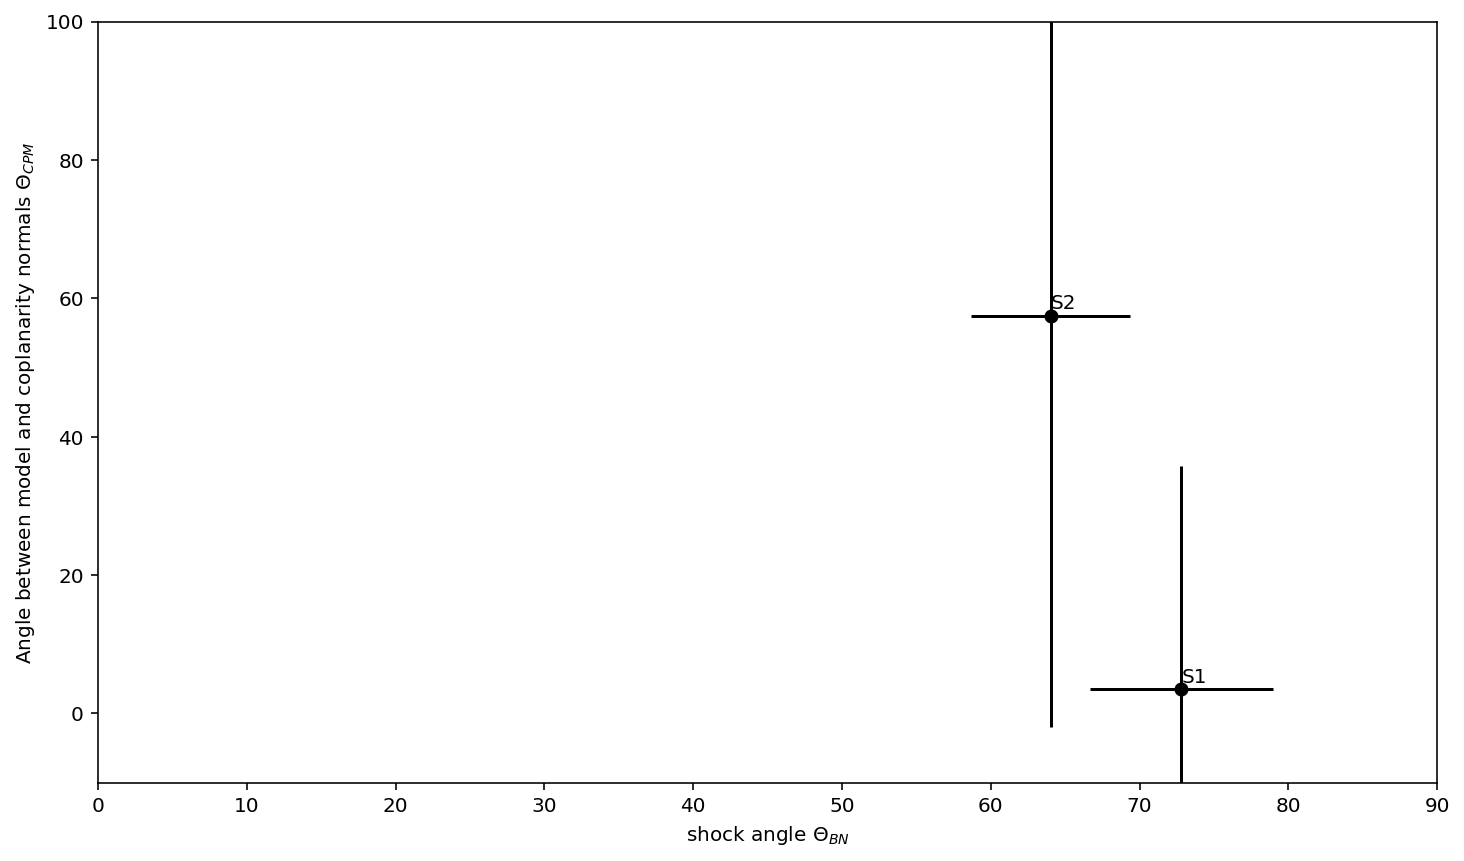

In [13]:
plt.figure()
plt.plot(ave_shock,t,'.')
plt.xlabel('shock angle ${\Theta}_{BN}$')
plt.ylabel('Angle between model and coplanarity normals ${\Theta}_{CPM}$ ')
plt.errorbar(ave_shock,t,xerr=std,yerr=st,fmt='o',color='k')
plt.ylim(-10,100)
plt.xlim(0,90 )
for i in range(len(srho_ncp)):
    S='S'+str(i+1)
    plt.annotate(S, (ave_shock[i],t[i]+1) )